> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# II: Lasso Regression

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-03-06 06:14:29.346109


# Problem description

The training set ($\texttt{crime-train.csv}$) consist of local crime statistics for 1,595 communities. We have 95 features to estimate the crime rate denoted by $\texttt{ViolentCrimesPerPop}$. These features include possibly relevant variables such as the size of the police force or the percentage of children that graduate high school.

Let's use the training set to fit a model which can predict the crime rate in new communities, and evaluate model performance on the test set ($\texttt{crime-test.csv}$). The number of featrues and other statistics are exactly the same as the training set. 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df_train = pd.read_csv("crime-train.csv")
df_test = pd.read_csv("crime-test.csv")

In [5]:
print('Shape of df_train :', df_train.shape)
df_train.head()

Shape of df_train : (1595, 96)


,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,-0.24,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,-0.29,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,1.05,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,0.66,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,0.76,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39


In [6]:
print('Shape of df_test :', df_test.shape)
df_test.head()

Shape of df_test : (399, 96)


,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.08,-0.14,0.35,-0.41,-0.10,-0.46,-1.41,-0.11,0.48,1.43,...,-0.23,-0.24,-1.17,-0.19,-0.93,-0.61,0.13,-0.65,0.65,-0.39
1,0.22,0.02,-0.45,-0.22,-0.24,-0.40,-0.19,0.12,0.68,-0.29,...,-0.23,-0.80,0.49,-0.36,-0.08,-0.26,0.68,-0.70,-0.66,-0.39
2,0.06,-0.45,0.28,-0.16,0.18,-0.46,-1.25,-0.34,0.68,0.14,...,-0.23,-0.67,0.05,-0.03,-0.18,-0.71,-0.50,-0.26,-0.66,-0.39
3,0.16,0.02,-0.27,-0.67,-0.51,-0.58,-0.69,0.12,0.68,0.95,...,-0.23,0.54,-0.68,-0.74,-0.68,-0.41,0.13,-0.46,1.22,-0.39
4,0.15,-0.22,1.20,3.71,3.53,3.99,-1.19,-0.11,0.68,-1.25,...,-0.23,0.54,-0.63,-2.84,-3.12,-3.29,-0.50,1.07,0.78,-0.39


# Solve the Problems (80 points)

## I. Lasso method 
### P1.1
(*35 points*)As there are a considerable number of input variables, overfitting is a serious issue. In order to avoid this, implement the **coordinate descent LASSO algorithm**.(including SoftThresholding) Note that you should consider an additional feature to consider **an intercept term**. Your function should accept a scalar value of the regularization parameter $\lambda$, a vector-valued output variable ($y$), a matrix of input variables ($X$), and an initial vector of weights ($w_0$). It should output a vector of coefficient values ($\hat w$). An initial vector of weights ($w_0$) is set to random Gaussian with mean of 0 and standard deviation of 1, respectively. You can use the random function provided by Numpy: random.normal(mean, standard deviation, size of samples).

> Convergence condition: $||\hat w_t - \hat w_{t+1}||_\infty < 10^{-6}$, i.e., $max(abs(\hat w_t - \hat w_{t+1})) < 10^{-6}$, where $t$ is a number of iteration.      
> Loss function = RSS

In [7]:
from P02 import insert_intercept, split_data, CoordinateLasso

In [8]:
df_train = insert_intercept(df_train) #inserting intercept term
df_test = insert_intercept(df_test)

In [9]:
print('Shape of df_train :', df_train.shape)
df_train.head()

Shape of df_train : (1595, 97)


,ViolentCrimesPerPop,intercept,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,1,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,1,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,1,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,1,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,1,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39


In [10]:
print('Shape of df_test :', df_test.shape)
df_test.head()

Shape of df_test : (399, 97)


,ViolentCrimesPerPop,intercept,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.08,1,-0.14,0.35,-0.41,-0.10,-0.46,-1.41,-0.11,0.48,...,-0.23,-0.24,-1.17,-0.19,-0.93,-0.61,0.13,-0.65,0.65,-0.39
1,0.22,1,0.02,-0.45,-0.22,-0.24,-0.40,-0.19,0.12,0.68,...,-0.23,-0.80,0.49,-0.36,-0.08,-0.26,0.68,-0.70,-0.66,-0.39
2,0.06,1,-0.45,0.28,-0.16,0.18,-0.46,-1.25,-0.34,0.68,...,-0.23,-0.67,0.05,-0.03,-0.18,-0.71,-0.50,-0.26,-0.66,-0.39
3,0.16,1,0.02,-0.27,-0.67,-0.51,-0.58,-0.69,0.12,0.68,...,-0.23,0.54,-0.68,-0.74,-0.68,-0.41,0.13,-0.46,1.22,-0.39
4,0.15,1,-0.22,1.20,3.71,3.53,3.99,-1.19,-0.11,0.68,...,-0.23,0.54,-0.63,-2.84,-3.12,-3.29,-0.50,1.07,0.78,-0.39


In [11]:
X_train, y_train = split_data(df_train) # X, y : numpy array
X_test, y_test = split_data(df_test)

In [12]:
X_train[0], X_train.shape

(array([ 1.  , -0.45, -1.85, -1.06,  0.67,  0.08, -0.85, -0.34,  0.68,
        -0.24,  0.88, -0.89, -0.26, -1.27, -0.13, -0.53, -0.43,  0.1 ,
         0.06,  0.23, -0.26, -0.11, -0.2 , -0.36, -0.28, -0.82, -0.71,
        -0.29, -0.46,  1.32,  0.86, -1.66,  0.14, -0.44,  2.95,  1.11,
         2.41,  2.75, -1.28, -0.9 , -0.73, -0.29, -1.01, -0.25,  0.02,
        -0.33, -0.04, -0.23,  0.91,  1.23,  1.2 ,  1.04,  0.29,  0.37,
         0.28,  0.2 ,  0.24, -0.23, -0.55, -0.8 , -1.72, -1.29, -1.24,
        -1.54,  0.07,  1.88, -1.23, -0.38,  0.36, -1.67, -0.85, -0.97,
         0.67, -0.43, -1.18, -0.24, -0.27, -0.25,  0.34,  0.04, -0.09,
        -0.07, -1.18, -0.69, -1.16, -0.29, -0.23, -0.02, -0.53, -1.08,
        -0.13, -0.66, -0.41, -0.56,  1.26, -0.39]), (1595, 96))

### Hint 
You should save previous weights by using an inner function ***copy()***  
Please refer following examples.

In [13]:
a = np.array([1,2,3])
b = a
a[2] = 1
print(b)

[1 2 1]


In [14]:
a = np.array([1,2,3])
b = a.copy()
a[2] = 1
print(b)

[1 2 3]


In [15]:
lambda_ = 600
w, error_history = CoordinateLasso(X_train, y_train, lambda_)

> After iterations, you should get correct $\texttt{ViolentCrimesPerPop}$ for fixed feature values

In [16]:
np.random.seed(0)# fixing values
new_features = np.random.normal(0, 1, size = w.size) # test_features
ViolentCrimesPerPop = w.T.dot(new_features)
print(ViolentCrimesPerPop)

0.41908132597747155


### P1.2
(*5 points*) Plot training error (sum of squared errorr) over the number of itertaions when $\lambda = 600$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [17]:
from P02 import plot_error_over_iterations

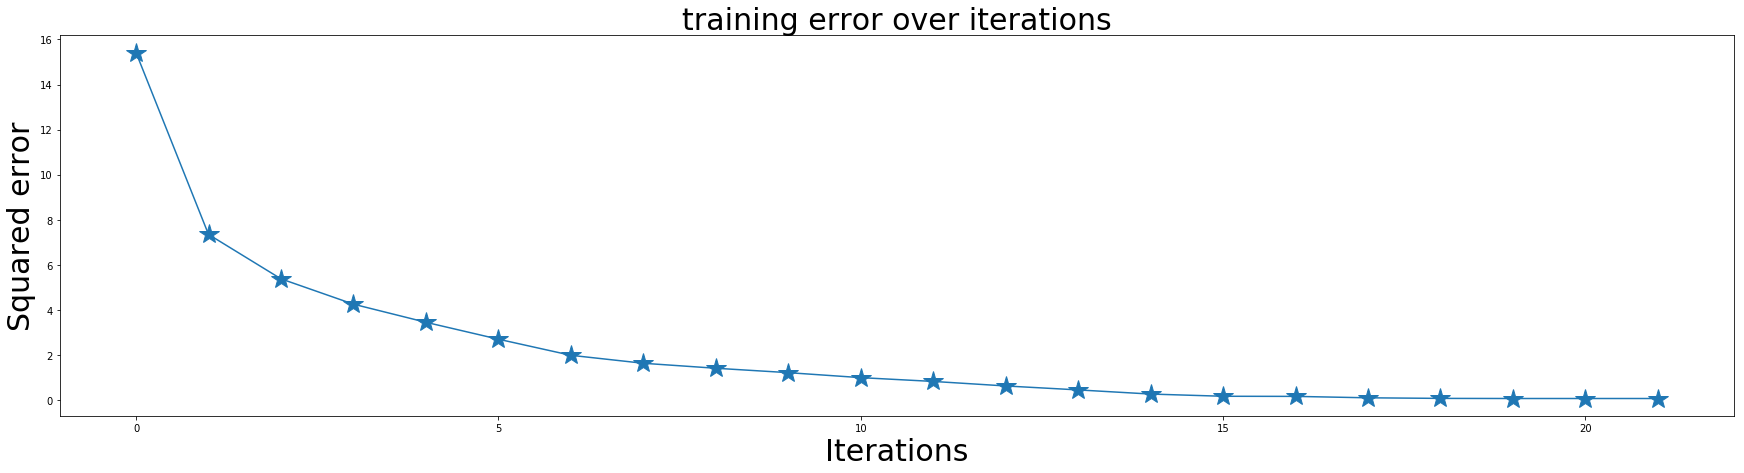

In [18]:
_ = plot_error_over_iterations(error_history)

## II. Regularization parameter 
Initially, set $\lambda=600$, and adjust it by cutting it down by a factor of 2 and run again, until we have models for 10 values of $\lambda$ in total. For each trial, set initial weights to $\mathcal{N}(0,1)$ (Normal random variables with mean 0 and variance 1).   

### P2.1
(*10 points*) Plot weights (coefficients) for the features $\texttt{agePct12t29}$, $\texttt{pctWSocSec}$, $\texttt{PctKids2Par}$, $\texttt{PctIlleg}$, and $\texttt{HousVacant}$ over $\log(\lambda)$. That is, plot the coefficient paths.   
Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *

In [19]:
from P02 import stack_weights_by_lambda, plot_weights

In [20]:
lambda_ = np.array([600.0 / (2 ** i) for i in range(10)])
# w_tot is a numpy array which saves all weights (after coordinate gradient descent) for 10 different lambda values
w_tot = stack_weights_by_lambda(lambda_ , X_train, y_train)
print(w_tot.shape)

(10, 96)


In [21]:
features = ['agePct12t29', 'pctWSocSec', 'PctKids2Par', 'PctIlleg', 'HousVacant']

<Figure size 2160x504 with 0 Axes>

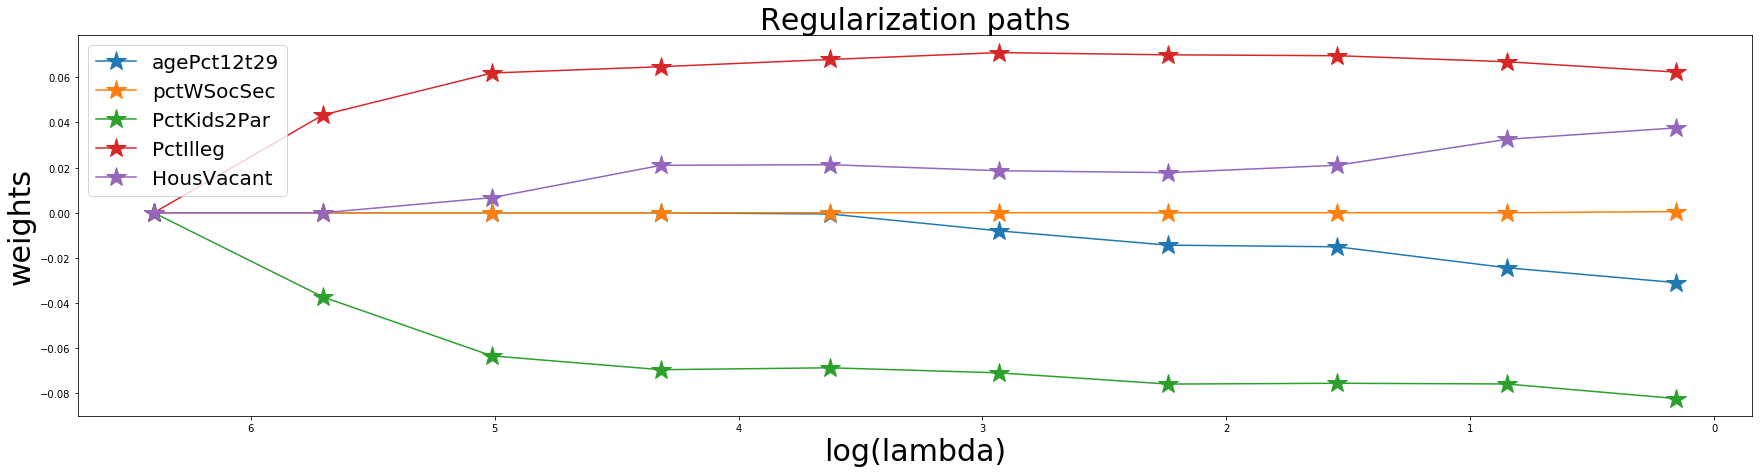

In [22]:
_ = plot_weights(lambda_, w_tot, df_train, features)

### P2.2
(*10 points*) Plot training error (sum of squared error) over $\log(\lambda)$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [23]:
from P02 import plot_training_error

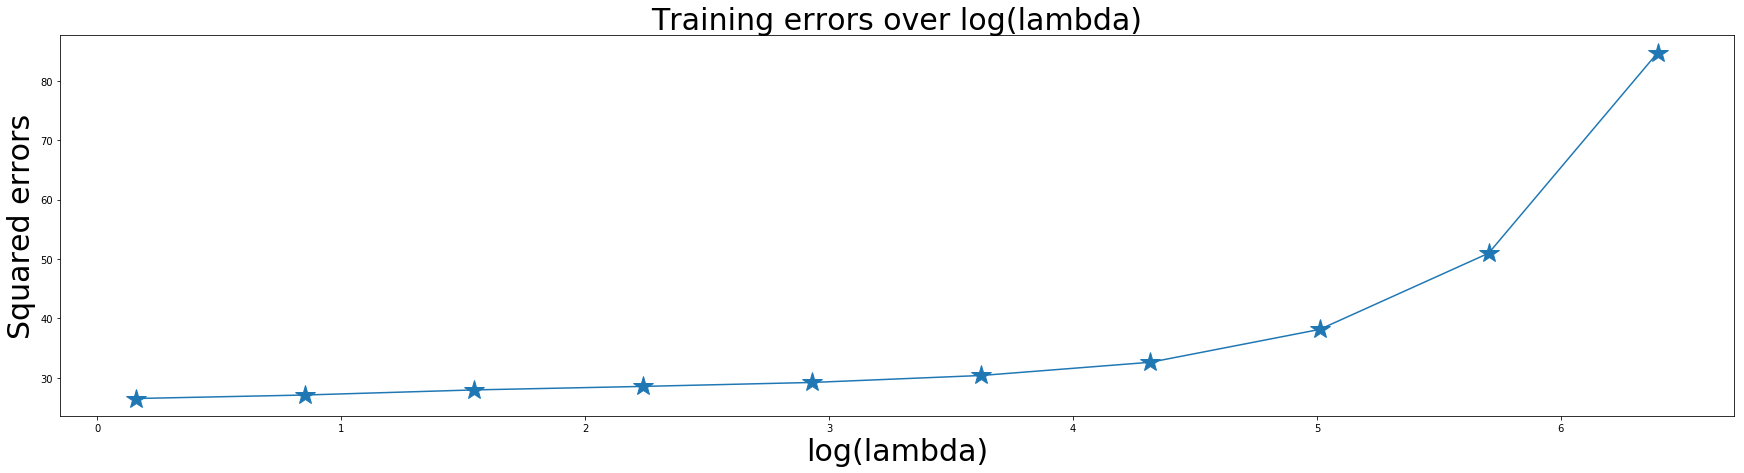

In [24]:
_ = plot_training_error(lambda_, w_tot, X_train, y_train)

### P2.3
(*10 points*) Plot test error (sum of squared error) over $\log(\lambda)$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [25]:
from P02 import plot_test_error

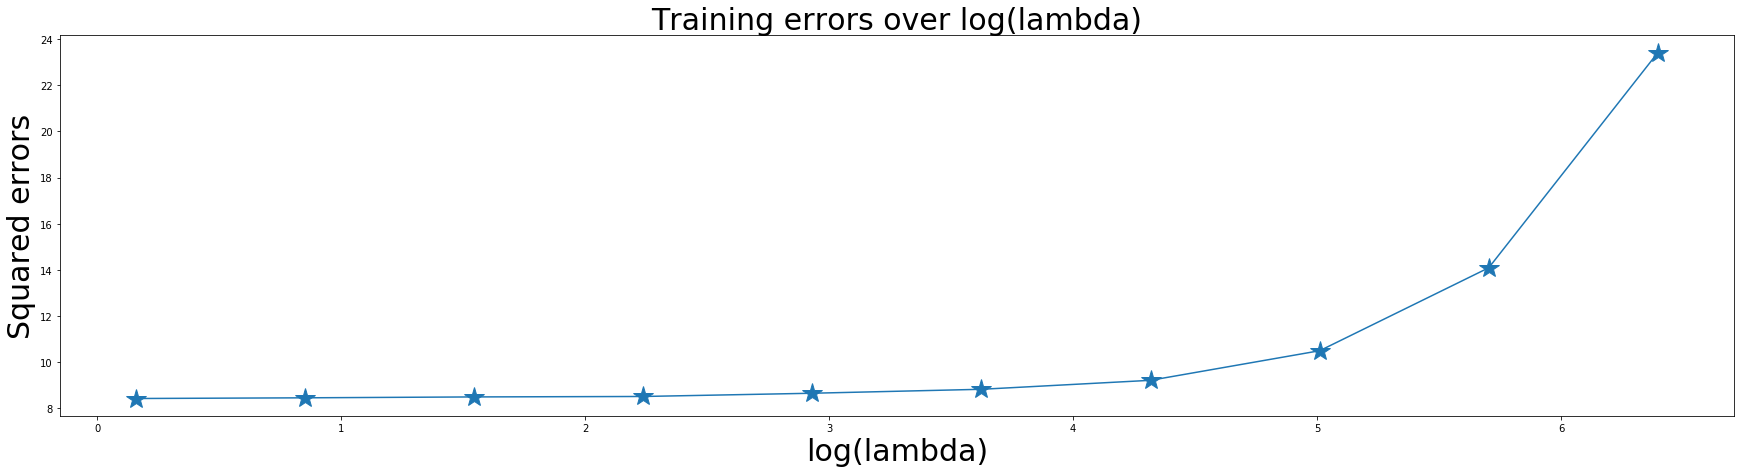

In [26]:
_ = plot_test_error(lambda_, w_tot, X_test, y_test)

### P2.4
(*10 points*) Plot number of nonzero weights over $\lambda$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [27]:
from P02 import plot_number_of_nonzero_index

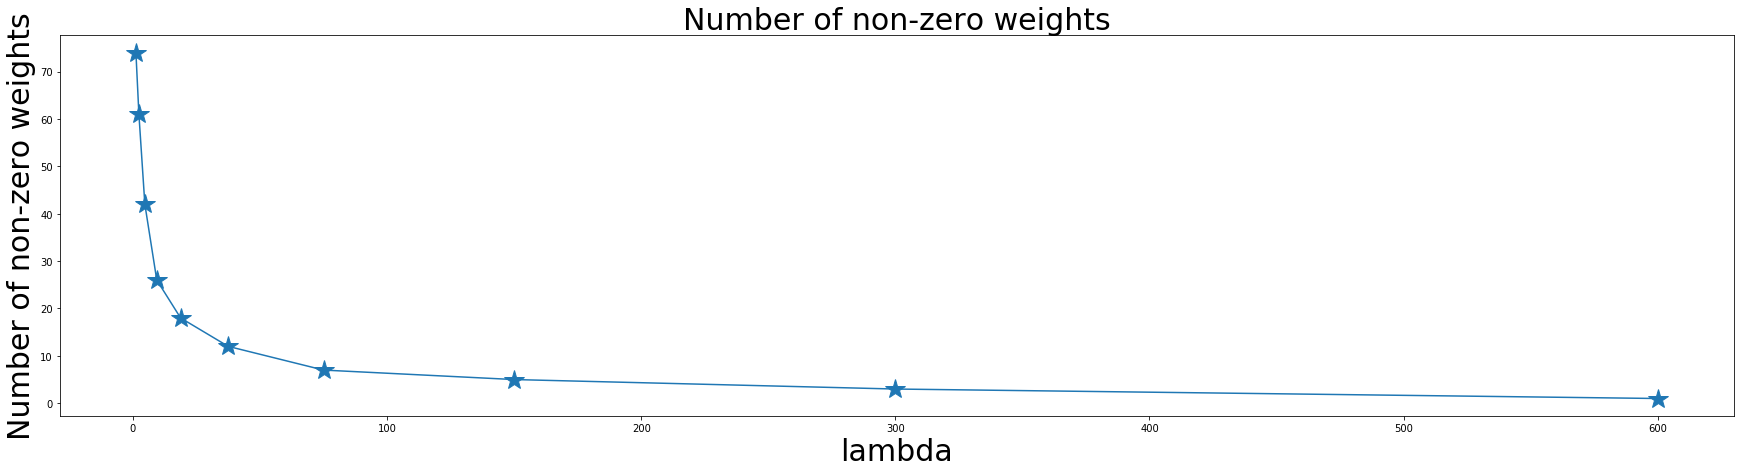

In [28]:
_ = plot_number_of_nonzero_index(lambda_, w_tot)




# Result Analysis and Discussion (20 points)



For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.   
You can write **Result Analysis and Discussion** with either Korean or English.

Your answer must include the analysis and discussion about:

- Brief explanation about
    - Regularization (Ridge, Lasso), Coordinate Gradient Descent
- Result according to value of $\lambda$ 
    - Weights(values of weights, # of non-zero weights)
    - Training error
    - Test error